# Loading packages

In [65]:
import matplotlib.pyplot as plt

# static

In [66]:
TRAIN_PATH = '/content/drive/MyDrive/student_cup_2021/dataset/train.csv'
TEST_PATH = '/content/drive/MyDrive/student_cup_2021/dataset/test.csv'
GENRE_PATH = '/content/drive/MyDrive/student_cup_2021/dataset/genre_labels.csv'
SAMPLE_PATH = '/content/drive/MyDrive/student_cup_2021/dataset/sample_submit.csv'

# Loading data

In [67]:
import pandas as pd

df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df_genre = pd.read_csv(GENRE_PATH)

df = pd.concat([df_train.drop('genre', axis=1), df_test], axis=0)

print('df_train shape: {0}, df_test shape: {1}, df_genre shape: {2}'.format(df_train.shape, df_test.shape, df_genre.shape))
print('df shape: {0}'.format(df.shape))

df_train shape: (4046, 14), df_test shape: (4046, 13), df_genre shape: (11, 2)
df shape: (8092, 13)


In [68]:
df_train.head()

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown


In [69]:
df_test.head()

,index,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,4046,43,192465,0.559812,0.565035,0.522237,-12.217087,0.620510,0.389727,0.214989,0.161924,77-96,region_I
1,4047,40,226536,0.134002,0.542547,0.493128,-2.612846,0.853089,0.163106,0.184183,0.155460,121-152,unknown
2,4048,58,215385,0.140537,0.643086,0.533189,-3.439684,0.834416,0.429304,0.167352,0.179191,121-152,region_K
3,4049,49,254494,0.266406,0.456733,0.410583,-10.830424,0.534261,0.151830,0.174403,0.186061,77-96,region_D
4,4050,50,230934,0.351907,0.526235,0.645625,-9.099337,0.612474,0.319161,0.157594,0.184142,97-120,region_E


In [70]:
df_genre.head()

,genre,labels
0,country,0
1,electronic,1
2,folk,2
3,hip-hop,3
4,jazz,4


# function

## plot # of categorical

In [71]:
def plot_n_categorical(dataframe, col):
  
  plt.figure(figsize=(24, 6))

  plt.bar(dataframe[col].value_counts(sort=True).index.values, dataframe[col].value_counts(sort=True).values)

  plt.xlabel('a kind of '+col)
  plt.ylabel('# of each _')

  plt.show()

## plot # of categorical compared

In [72]:
def plot_n_categorical_compared(dataframe, col, target):

  plt.figure(figsize=(24, 10))

  color_dict = {'classic': 'red',
                'country': 'blue',
                'electronic': 'orange',
                'folk': 'green',
                'hip-hop': 'black',
                'jazz': 'purple',
                'latin': 'brown',
                'other-light-music': 'olive',
                'pop': 'cyan',
                'religious': 'pink',
                'rock': 'gray',}
  genre_list = ['classic', 'country', 'electronic', 'folk', 'hip-hop', 'jazz', 'latin', 'other-light-music', 'pop', 'religious', 'rock']
  tmp = 0
  num = 0

  for i, j in zip(dataframe.groupby(col)[target].value_counts().index.values, dataframe.groupby(col)[target].value_counts().values):  
    if tmp == i[0]:
      if i[1] in genre_list:
        plt.bar(i[0], j, bottom=num, color=color_dict[i[1]], label=i[1])
        genre_list.remove(i[1])
      else:
        plt.bar(i[0], j, bottom=num, color=color_dict[i[1]])
      
      num += j
    else:
      num = 0

      if i[1] in genre_list:
        plt.bar(i[0], j, bottom=num, color=color_dict[i[1]], label=i[1])
        genre_list.remove(i[1])
      else:
        plt.bar(i[0], j, bottom=num, color=color_dict[i[1]])

      num += j
      tmp = i[0]

  plt.xlabel('a kind of')
  plt.ylabel('# of each genre')
  plt.legend()

  plt.show()

## print detail

# EDA

## 相関関係

In [73]:
df_train = df_train.dropna()

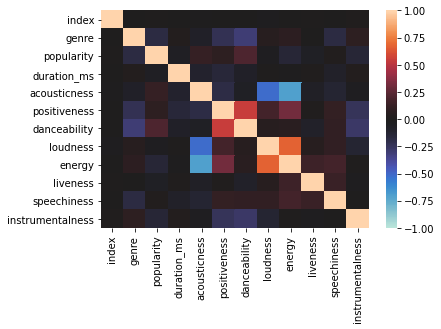

In [74]:
import seaborn as sns

sns.heatmap(df_train.corr(), vmax=1, vmin=-1, center=0)

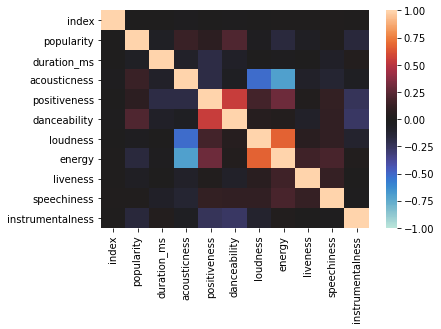

In [75]:
import seaborn as sns

sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0)

## 欠損値

In [76]:
df_train.isnull().sum()

index               0
genre               0
popularity          0
duration_ms         0
acousticness        0
positiveness        0
danceability        0
loudness            0
energy              0
liveness            0
speechiness         0
instrumentalness    0
tempo               0
region              0
dtype: int64

In [77]:
print(len(df_train[df_train.isnull().any(axis=1) == True]))

df_train[df_train.isnull().any(axis=1) == True]

0


,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region


In [78]:
df_test.isnull().sum()

index                0
popularity           0
duration_ms          0
acousticness         1
positiveness        14
danceability        11
loudness             0
energy               1
liveness             6
speechiness         11
instrumentalness     2
tempo                0
region               0
dtype: int64

In [79]:
print(len(df_test[df_test.isnull().any(axis=1) == True]))

df_test[df_test.isnull().any(axis=1) == True]

14


,index,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
65,4111,32,8307,0.705052,NaN,NaN,-5.838485,0.677236,0.330491,NaN,0.450735,0-40,region_L
161,4207,29,5826,0.303558,NaN,NaN,-3.612817,0.770469,NaN,NaN,0.834549,0-40,region_L
200,4246,16,5998,NaN,NaN,NaN,-9.770362,NaN,NaN,NaN,NaN,0-40,region_P
313,4359,32,15150,0.021372,NaN,0.207516,-1.013198,0.906015,0.516378,0.272722,0.833171,77-96,region_L
848,4894,32,28304,0.133870,NaN,0.313016,-4.504644,0.654447,0.147979,0.144175,0.851650,77-96,region_L
935,4981,28,6199,0.800011,NaN,NaN,-30.216122,0.147273,NaN,NaN,0.125978,0-40,region_B
1750,5796,28,6506,0.162008,NaN,NaN,-2.325072,0.845391,NaN,NaN,0.876464,0-40,unknown
1790,5836,18,17375,0.093081,NaN,0.280091,-6.356741,0.459276,0.339337,0.140230,0.712319,64-76,region_P
1834,5880,28,9705,0.088208,NaN,NaN,-6.473317,0.919014,0.506552,NaN,0.742145,0-40,region_L
2018,6064,34,13629,0.067932,NaN,NaN,-3.460831,0.921675,0.386363,NaN,0.768600,0-40,region_L


In [80]:
df.isnull().sum()

index                0
popularity           0
duration_ms          0
acousticness         1
positiveness        24
danceability        19
loudness             0
energy               1
liveness             9
speechiness         19
instrumentalness     3
tempo                0
region               0
dtype: int64

In [81]:
print(len(df[df.isnull().any(axis=1) == True]))

df[df.isnull().any(axis=1) == True]

24


,index,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
169,169,29,22132,0.183041,NaN,0.074635,-2.684752,0.424803,0.538192,0.275940,0.874660,57-63,region_L
332,332,18,5998,0.073058,NaN,NaN,-3.492185,0.482935,NaN,NaN,0.933298,0-40,region_P
1147,1147,17,5999,0.246239,NaN,NaN,-11.188019,0.138494,NaN,NaN,NaN,0-40,region_P
1824,1824,29,12904,0.878264,NaN,NaN,-37.820457,0.071458,0.306170,NaN,0.209245,0-40,region_B
1859,1859,17,6002,0.166670,NaN,NaN,-3.675506,0.630632,NaN,NaN,0.878543,0-40,region_P
1894,1894,28,12105,0.894437,NaN,NaN,-30.401654,0.294521,0.680640,NaN,0.353691,0-40,region_E
1942,1942,30,13559,0.125577,NaN,NaN,0.000000,0.856918,0.521328,NaN,0.809948,0-40,region_L
2088,2088,30,20748,0.149761,NaN,0.222094,-3.491594,0.814625,0.243798,0.302897,0.866409,64-76,region_L
2290,2290,54,256385,0.862298,NaN,NaN,-14.370051,0.127264,0.260063,NaN,0.195740,0-40,region_P
2619,2619,28,12907,0.174814,NaN,NaN,-4.747260,0.887299,0.493169,NaN,0.810391,0-40,region_L


## genre

- categorical data

- inbalanced data

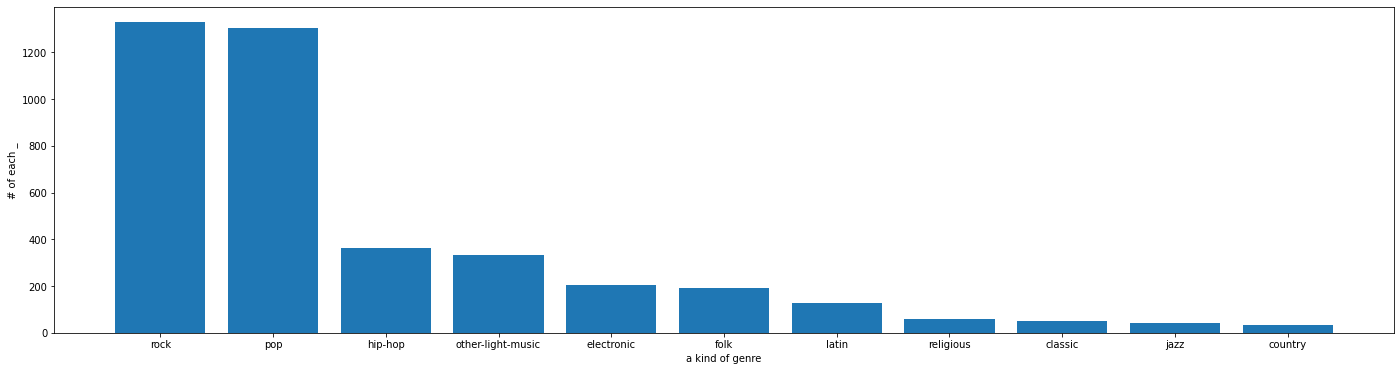

In [82]:
df_train['genre'] = df_train['genre'].astype(str)
df_genre['labels'] = df_genre['labels'].astype(str)

df_train['genre'] = df_train['genre'].map(df_genre.set_index('labels')['genre'].to_dict()) # 置換

plot_n_categorical(df_train, 'genre')

In [83]:
df_train['genre'].value_counts(sort=True)

rock                 1329
pop                  1304
hip-hop               362
other-light-music     334
electronic            205
folk                  191
latin                 126
religious              59
classic                50
jazz                   44
country                32
Name: genre, dtype: int64

## popularity

- int data but it is like categorical data

- the distribution is similar between train data & test data

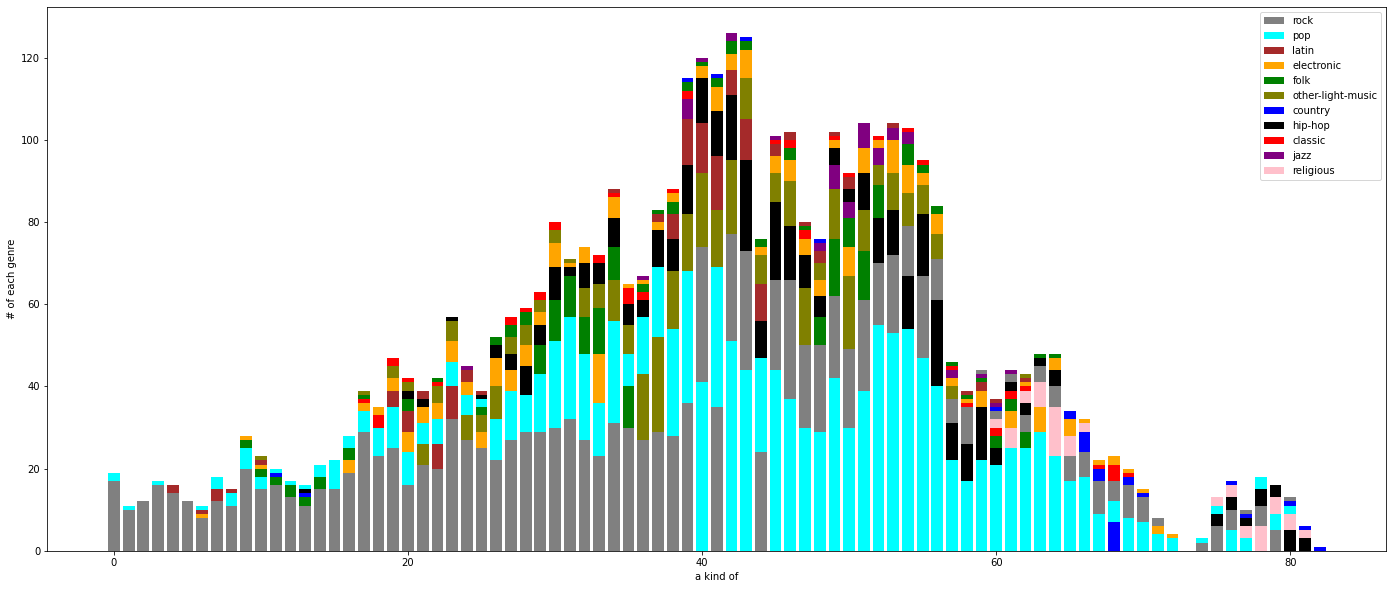

In [84]:
plot_n_categorical_compared(df_train, 'popularity', 'genre')

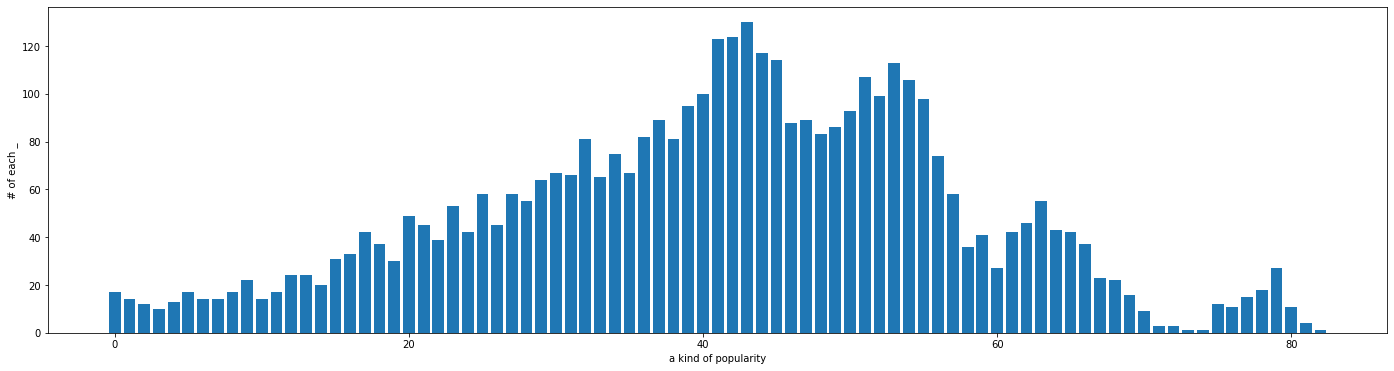

In [85]:
plot_n_categorical(df_test, 'popularity')

## tempo

- categorical data

- it is different distribution between train data & test data

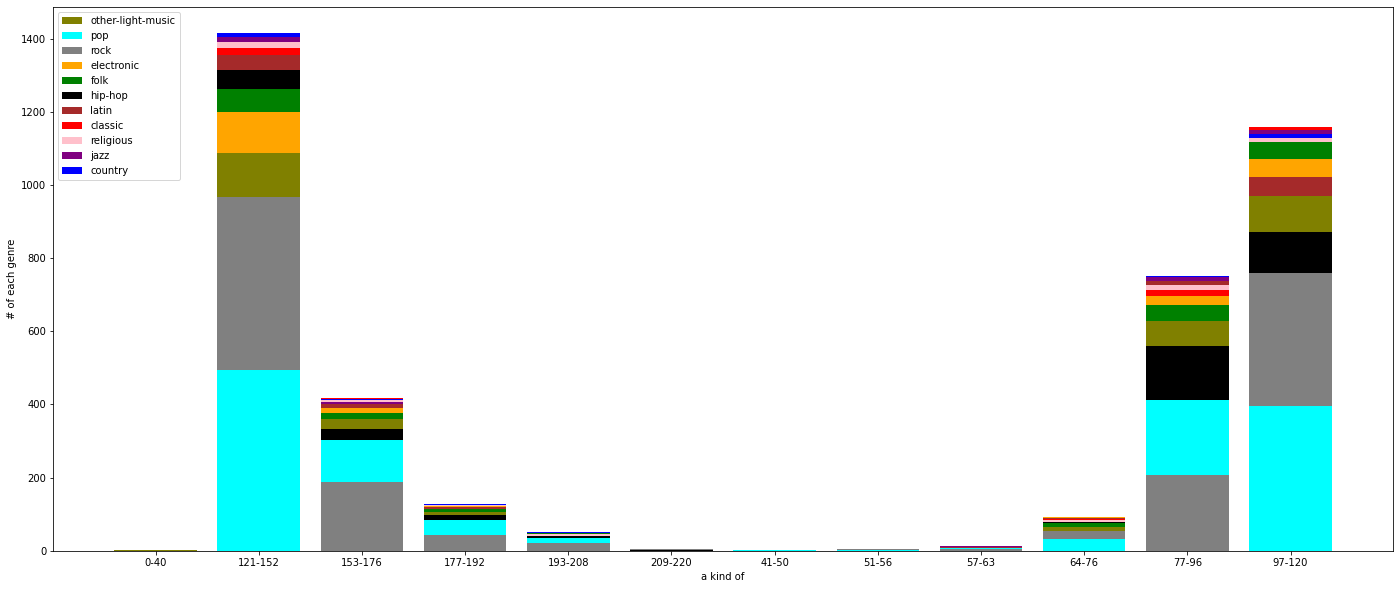

In [86]:
plot_n_categorical_compared(df_train, 'tempo', 'genre')

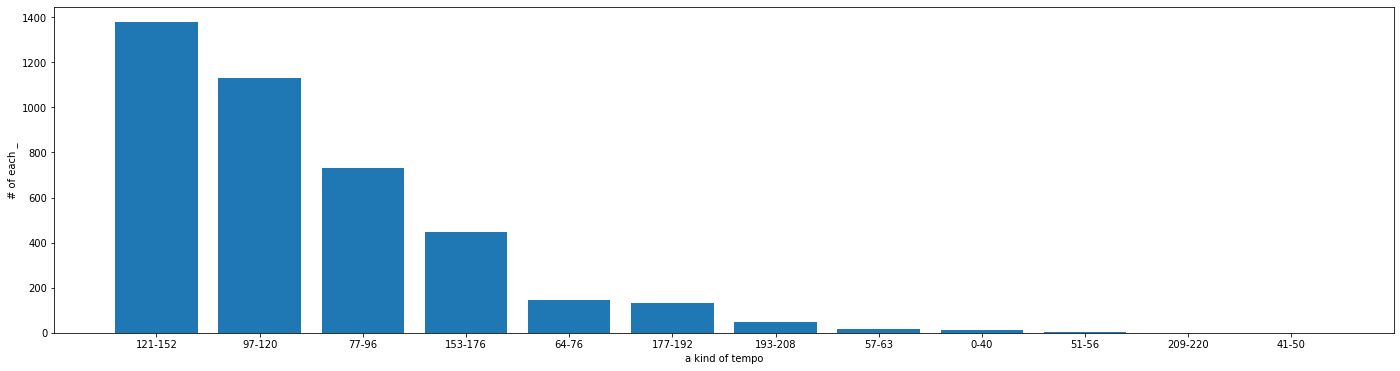

In [87]:
plot_n_categorical(df_test, 'tempo')

## region

- categorical data

- it is different distribution between train data & test data

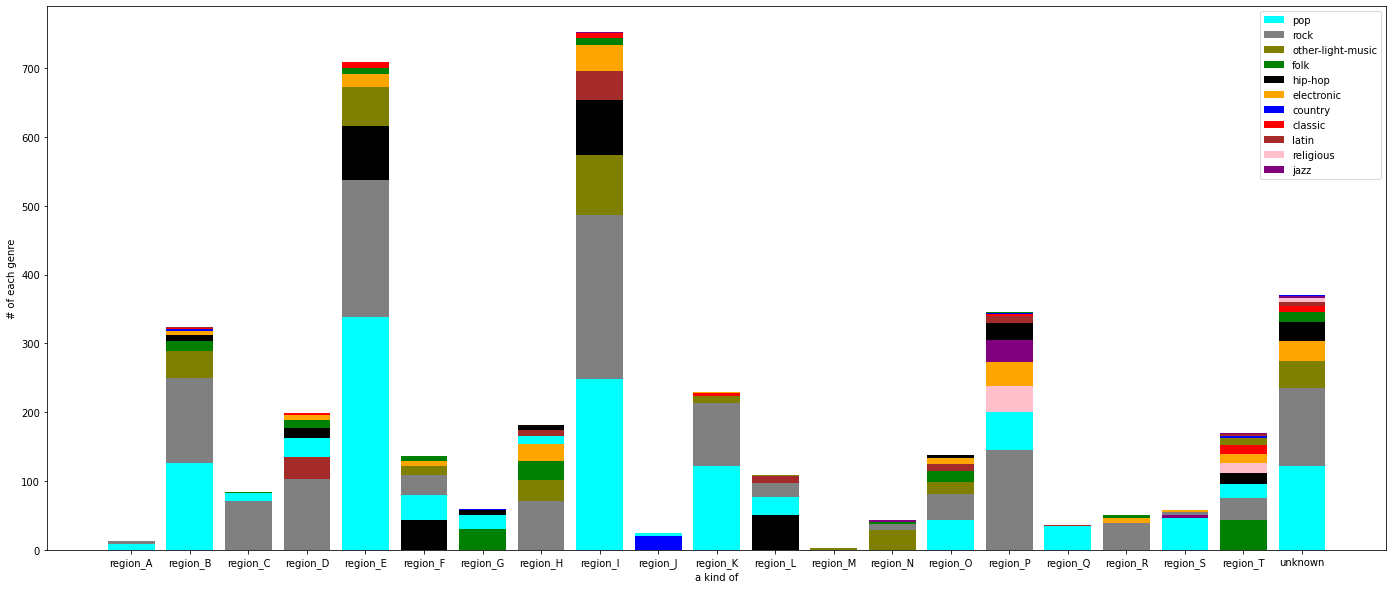

In [88]:
plot_n_categorical_compared(df_train, 'region', 'genre')

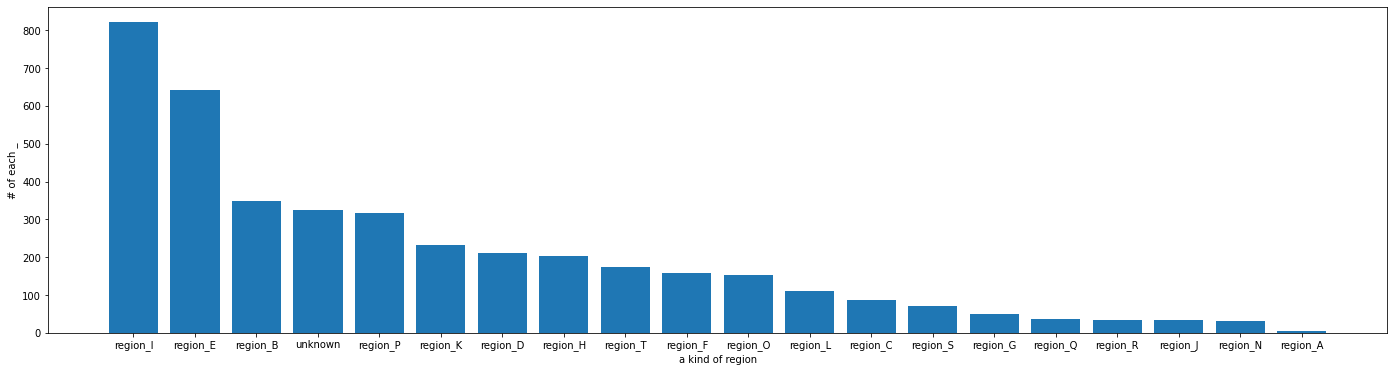

In [89]:
plot_n_categorical(df_test, 'region')

## loudness

In [90]:
# df['loudness_10'] = 10**df['loudness']
# df['loudness_10'].describe()
import numpy as np
# df['loudness_e'] = np.e**df['loudness']
# df['loudness_e'].describe()
col='loudness'
df['loudness_min_max'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [92]:
print('{0:.10f}, {1:.10f}'.format(df['loudness_min_max'].min(), df['loudness_min_max'].max()))

0.0000000000, 1.0000000000


# End